# **Task 03:**
## **TITANIC SURVIVAL PREDICTION**

- Utilize the Titanic dataset to construct a predictive model determining if a
passenger survived the Titanic disaster.
- This project serves as an introductory exercise, offering accessible data for analysis.
- The dataset comprises passenger details encompassing age, gender, ticket class,
fare, cabin, and survival outcome.
- By applying this data, you can embark on a classic project that provides insights
into survival patterns among Titanic passengers.

![Titanic Survival Prediction1.jpg](<attachment:Titanic Survival Prediction1.jpg>)
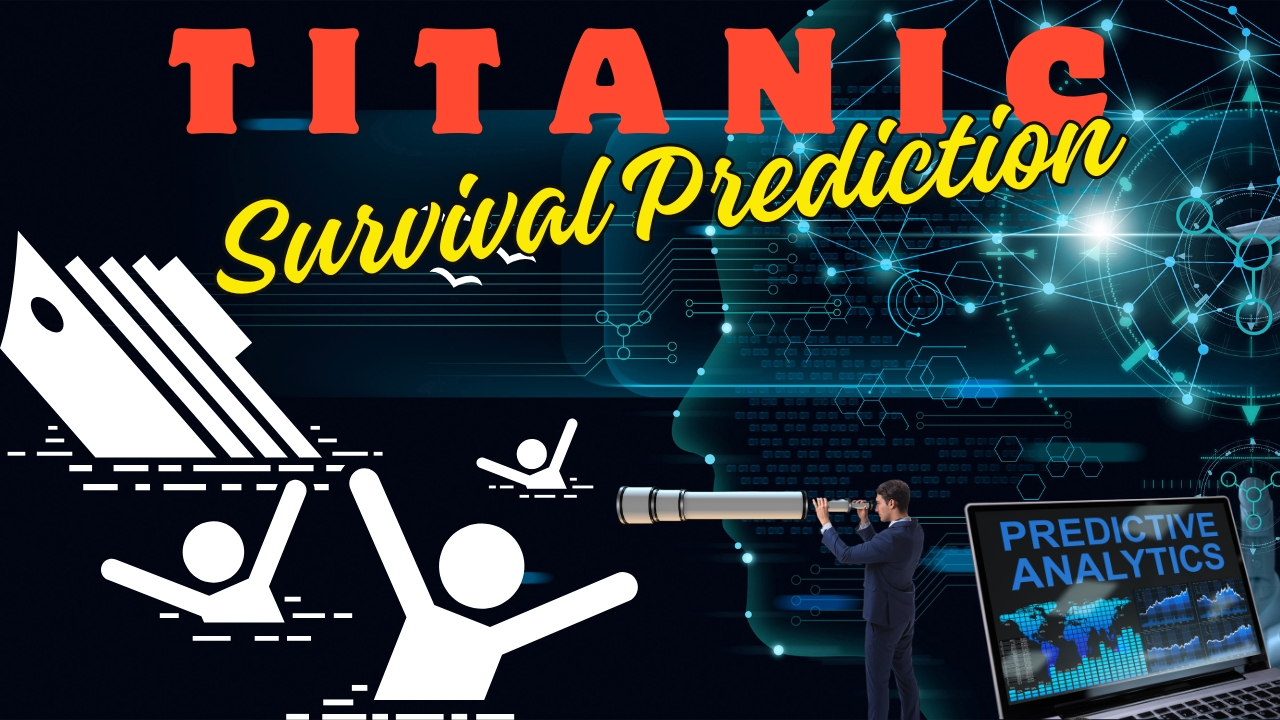

# 1.0 About Author
- Author: Mehak Iftikhar
- Project: Titanic Survival Prediction 

## Contact Info:
Click on link below to contact/follow/correct me:

- ***Email:*** mehakkhan301007@gmail.com
- [LinkedIn](https://www.linkedin.com/in/mehak-iftikhar/)
- [Facebook](https://www.facebook.com/profile.php?id=61552023122774)
- [Twitter](https://twitter.com/mehakkhan874)
- [Github](https://github.com/mehakiftikhar)

# 2.0 About Data
- Title: Titanic Survival Prediction
- Dataset: [link](https://www.kaggle.com/datasets/brendan45774/test-file)

  ## Metadata
  **`Source:`** I took the titanic test and gender submission dataset and combined them\
  **`Data Age:`** Never (Updated 2 years ago)\
  **`License:`** CC0: Public Domain

### 2.1 Task:
 Exploring the Iris Flower Dataset involves a step-by-step process. First, we clean and prepare the data to ensure it's accurate and consistent. Then, we summarize the data using descriptive statistics like averages and ranges. Next, we visualize the data with charts and graphs to see patterns and relationships. We detect outliers, which are unusual data points, and test our assumptions about the data. After pre-processing, we train a machine learning model and then call, train, and predict the model.

### 2.3 Kernel Version Used:
- Python 3.11.5

# ***3.0 Data Preparation:***

## 3.1 Import Libraries

Let's start the project by impoprting all the libraries that we will need in this project.

In [1]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

## 3.2 Data Loading and Exploration | Cleaning

### 3.2.1 Load the Dataset

In [2]:
# load the data from csv file placed locally in our pc
df = pd.read_csv('../Dataset/titanic.csv')

### Set the option to show maximum columns:

In [3]:
pd.set_option('display.max_columns', None)

### 3.2.2 Get a sneak peek of data:
The purpose of a sneak peek is to get a quick overview of the data and identify any potential problems or areas of interest.

In [4]:
# print the first 5 rows of the dataframe
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 3.2.3 Explore the Data

In [5]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### Let's have a look on the shape of the dataset:

In [6]:
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")

The Number of Rows are 418, and columns are 12.


### Lets see the column name:

In [7]:
# Lets see the column name
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Observation Set 1:
- There are `418` rows and `12` columns in the dataset.
- *The columns having `float` datatypes are `2`, `integer` datatype `5`, `object` datatype are `5`*
-  The columns in the datasets are:
   - 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
      'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'

---

### 3.2.4 Descriptive Statistics:
Descriptive statistics are a collection of quantitative measures that summarize and describe the main characteristics of a dataset.

In [8]:
# Summary Statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


---


# ***4.0 Dealing with Missing Values***

In [9]:
df.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [10]:
(df.isnull().sum() / len(df) * 100 ).sort_values(ascending=False)

Cabin          78.229665
Age            20.574163
Fare            0.239234
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Embarked        0.000000
dtype: float64

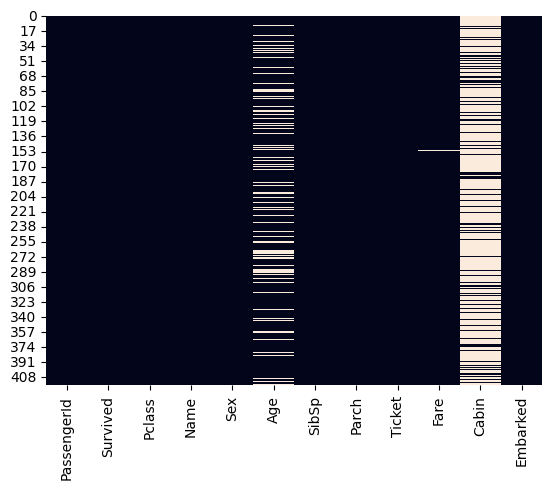

In [11]:
# plot the null values
sns.heatmap(df.isnull(), cbar=False)
plt.show()

## *Function to impute missing values from df*

In [12]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, r2_score, mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Cabin', 'Embarked']
bool_cols = []
numeric_cols = ['Age', 'Fare']

missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()

# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

(df.isnull().sum() / len(df) * 100 ).sort_values(ascending=False)

Missing Values Age : 20.57%


MAE = 10.039497014925374 

RMSE = 12.915441623799056 

R2 = 0.08033883964872002 

Missing Values Fare : 0.24%
MAE = 20.405164273809525 

RMSE = 53.007216573812464 

R2 = 0.3677027530106809 

Missing Values Cabin : 78.23%
The feature 'Cabin' has been imputed with 15.79 accuracy



PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64

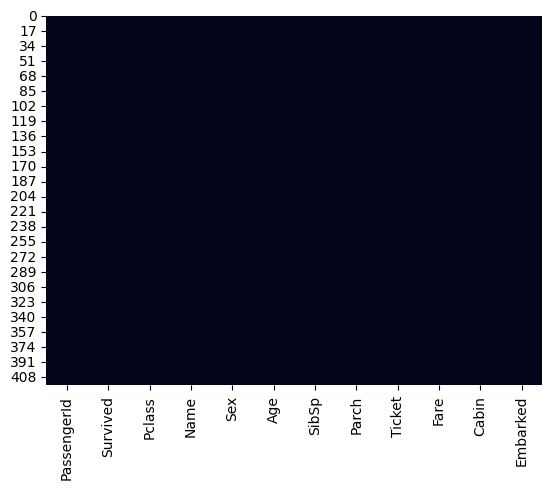

In [13]:
# plot missing values
sns.heatmap(df.isnull(), cbar=False)
plt.show()

## Milestone 1: There are no missing values in the dataset.
---

# ***5.0 Machine Learning***

## ***5.1 Model Selection and Evaluation:***

#### Lets make X and y in our Data:

In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
X = df.drop(['Survived','Name'], axis=1)
y = df['Survived']

In [16]:
# encode the data
label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

#### Train_test_split the Data:

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Call, Train and Predict the Model:

In [18]:
# Call the Model
model = RandomForestClassifier(random_state=42)

In [19]:
# import pipeline
from sklearn.pipeline import Pipeline


# Create a pipeline for each model
pipeline = Pipeline([
    ('model', model)
    ])
    
# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
# Calculate mean accuracy
mean_accuracy = scores.mean()
    
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)
    
# Make predictions on the test data
y_pred = pipeline.predict(X_test)
    
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
    
print("Model:", RandomForestClassifier())
print("Cross-validation Accuracy:", mean_accuracy)
print("Test Accuracy:", accuracy)
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

best_model = pipeline

Model: RandomForestClassifier()
Cross-validation Accuracy: 1.0
Test Accuracy: 1.0
Recall Score:  1.0
Precision Score:  1.0
F1 Score:  1.0


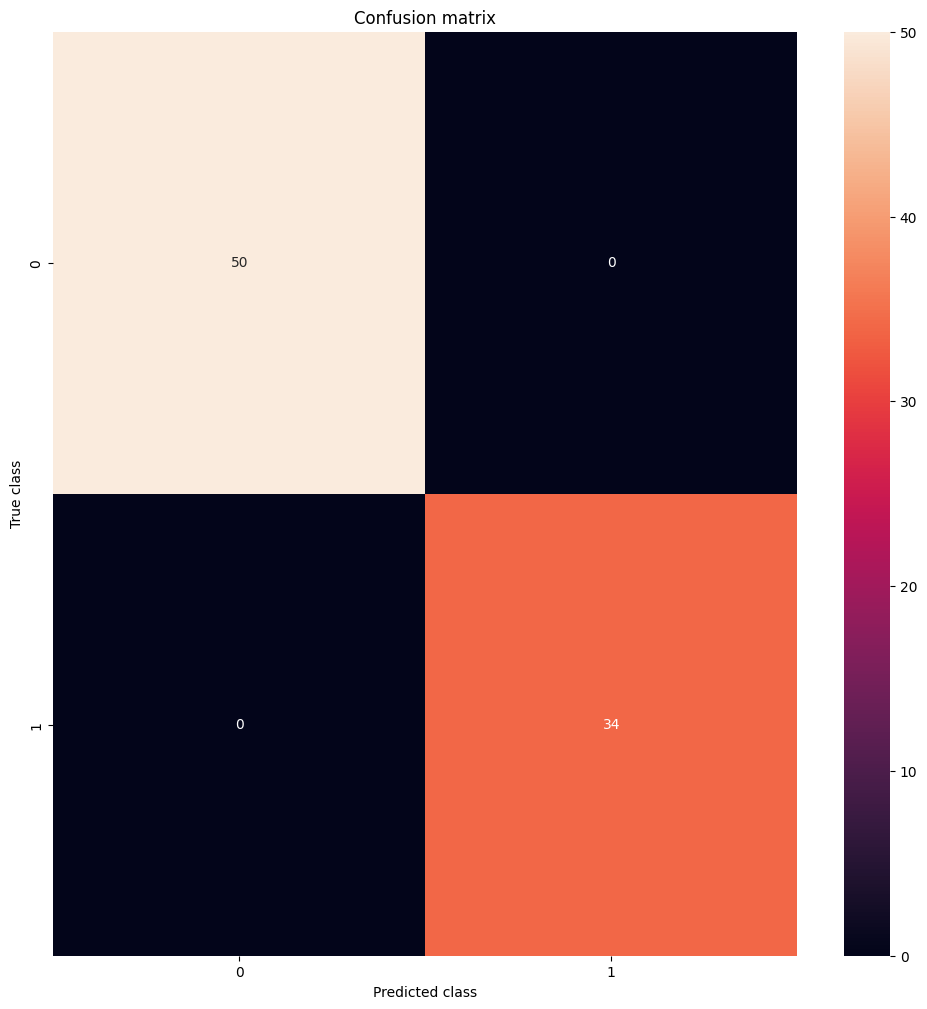

In [20]:

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

### Observation Set 4:
- I chose a Random Forest model.
- The test accuracy is 1.0, and the cross-validation accuracy is 1.0.
---

# Contact Details:
Click on link below to contact/follow/correct me:\

[LinkedIn](https://www.linkedin.com/in/mehak-iftikhar/)\
[Facebook](https://www.facebook.com/profile.php?id=61552023122774)\
[Twitter](https://twitter.com/mehakkhan874)\
[Kaggle](https://www.kaggle.com/mehakiftikhar)\
[Medium](https://medium.com/@mehakkhan301007)\
[Github](https://github.com/mehakiftikhar)

---